In [128]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [186]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train2 = train

In [165]:
y = train.Survived

In [166]:
train.drop('Survived',inplace=True,axis=1)
df=pd.concat([train,test], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [167]:
def get_titles():

    global df
    
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    df['Title'] = df.Title.map(Title_Dictionary)

In [168]:
get_titles()

In [169]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [170]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1)
df.drop('Sex',inplace=True,axis=1)

In [171]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,female,male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


In [172]:
title = list(set(df.Title))
title

['Miss', 'Mrs', 'Royalty', 'Mr', 'Officer', 'Master']

In [173]:
for i in title:
    medianAge = df[df['Title'] == i]['Age'].median()
    df.loc[df.Title == i,'Age'] = medianAge

In [174]:
df = df = pd.concat([df, pd.get_dummies(df['Embarked'],prefix = 'Embarked')], axis=1)

In [175]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,S,Mr,0,1,0,0,1


In [176]:
df.drop('Embarked',inplace=True,axis=1)

In [177]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,Mr,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,Mr,0,1,0,0,1


In [178]:
df = df = pd.concat([df, pd.get_dummies(df['Title'],prefix = 'Title')], axis=1)

In [179]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,...,male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,Mr,...,1,0,0,1,0,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,Mrs,...,0,1,0,0,0,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,...,0,0,0,1,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,...,0,0,0,1,0,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,Mr,...,1,0,0,1,0,0,1,0,0,0


In [180]:
df.drop('Title',inplace=True,axis=1)

In [181]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1,0,0,0


In [182]:
df = pd.concat([df, pd.get_dummies(df['Pclass'],prefix = 'Pclass')], axis=1)

In [183]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,...,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3
0,1,3,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,...,1,0,0,1,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,...,0,0,0,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,1,0,1,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,1,0,0,0,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,...,1,0,0,1,0,0,0,0,0,1


In [184]:
df.drop('Pclass',inplace=True,axis=1)

In [185]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3
count,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,27.758976,0.498854,0.385027,33.295479,0.355997,0.644003,0.206264,0.093965,0.698243,0.046600,0.200153,0.578304,0.152788,0.017571,0.004584,0.246753,0.211612,0.541635
std,378.020061,7.128903,1.041658,0.865560,51.758668,0.478997,0.478997,0.404777,0.291891,0.459196,0.210862,0.400267,0.494019,0.359921,0.131435,0.067573,0.431287,0.408607,0.498454
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,29.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,982.000000,29.000000,1.000000,0.000000,31.275000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1309.000000,49.500000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
df['family_size'] = df['Parch'] + df['SibSp']

In [193]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,family_size
0,1,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,1,...,0,0,1,0,0,0,0,0,1,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,0,...,0,0,0,1,0,0,1,0,0,1
2,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,...,0,1,0,0,0,0,0,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,...,0,0,0,1,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,1,...,0,0,1,0,0,0,0,0,1,0


In [195]:
df['Alone'] = 0
df.loc[df['family_size'] > 0,'Alone'] = 0 #has family
df.loc[df['family_size'] == 0,'Alone'] = 1

In [196]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,...,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,family_size,Alone
0,1,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,1,...,0,1,0,0,0,0,0,1,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,0,...,0,0,1,0,0,1,0,0,1,0
2,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,...,1,0,0,0,0,0,0,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,...,0,0,1,0,0,1,0,0,1,0
4,5,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,1,...,0,1,0,0,0,0,0,1,0,1


In [197]:
df["Ticket_cat"]=df['Ticket'].str.extract('([a-zA-z])',expand=False)
df["Ticket_cat"] = df["Ticket_cat"].fillna("N")#numerical
df["Ticket_cat"] = df["Ticket_cat"].astype('category')

In [198]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,...,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,family_size,Alone,Ticket_cat
0,1,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,1,...,1,0,0,0,0,0,1,1,0,A
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,0,...,0,1,0,0,1,0,0,1,0,P
2,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,...,0,0,0,0,0,0,1,0,1,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,...,0,1,0,0,1,0,0,1,0,N
4,5,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,1,...,1,0,0,0,0,0,1,0,1,N


In [202]:
df = df = pd.concat([df, pd.get_dummies(df['Ticket_cat'],prefix = 'Ticket')], axis=1)

In [203]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,...,Alone,Ticket_cat,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,Ticket_S,Ticket_W
0,1,"Braund, Mr. Owen Harris",29.0,1,0,A/5 21171,7.2500,NaN,0,1,...,0,A,1,0,0,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,PC 17599,71.2833,C85,1,0,...,0,P,0,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",22.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,...,1,S,0,0,0,0,0,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,...,0,N,0,0,0,0,1,0,0,0
4,5,"Allen, Mr. William Henry",29.0,0,0,373450,8.0500,NaN,0,1,...,1,N,0,0,0,0,1,0,0,0


In [204]:
df.drop('Ticket',inplace=True,axis=1)
df.drop('Ticket_cat',inplace=True,axis=1)

In [205]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_C,...,family_size,Alone,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,Ticket_S,Ticket_W
0,1,"Braund, Mr. Owen Harris",29.0,1,0,7.2500,NaN,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",35.0,1,0,71.2833,C85,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",22.0,0,0,7.9250,NaN,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,"Allen, Mr. William Henry",29.0,0,0,8.0500,NaN,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [206]:
df.drop('Name',inplace=True,axis=1)

In [207]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_C,Embarked_Q,...,family_size,Alone,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,Ticket_S,Ticket_W
0,1,29.0,1,0,7.2500,NaN,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2,35.0,1,0,71.2833,C85,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,22.0,0,0,7.9250,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,35.0,1,0,53.1000,C123,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,29.0,0,0,8.0500,NaN,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [210]:
df.drop('Cabin',inplace=True,axis=1)

In [211]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,...,family_size,Alone,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,Ticket_S,Ticket_W
0,1,29.0,1,0,7.2500,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,2,35.0,1,0,71.2833,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,22.0,0,0,7.9250,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,4,35.0,1,0,53.1000,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,5,29.0,0,0,8.0500,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [212]:
train = df.head(891)
test = df.iloc[891:]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, y)

In [213]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

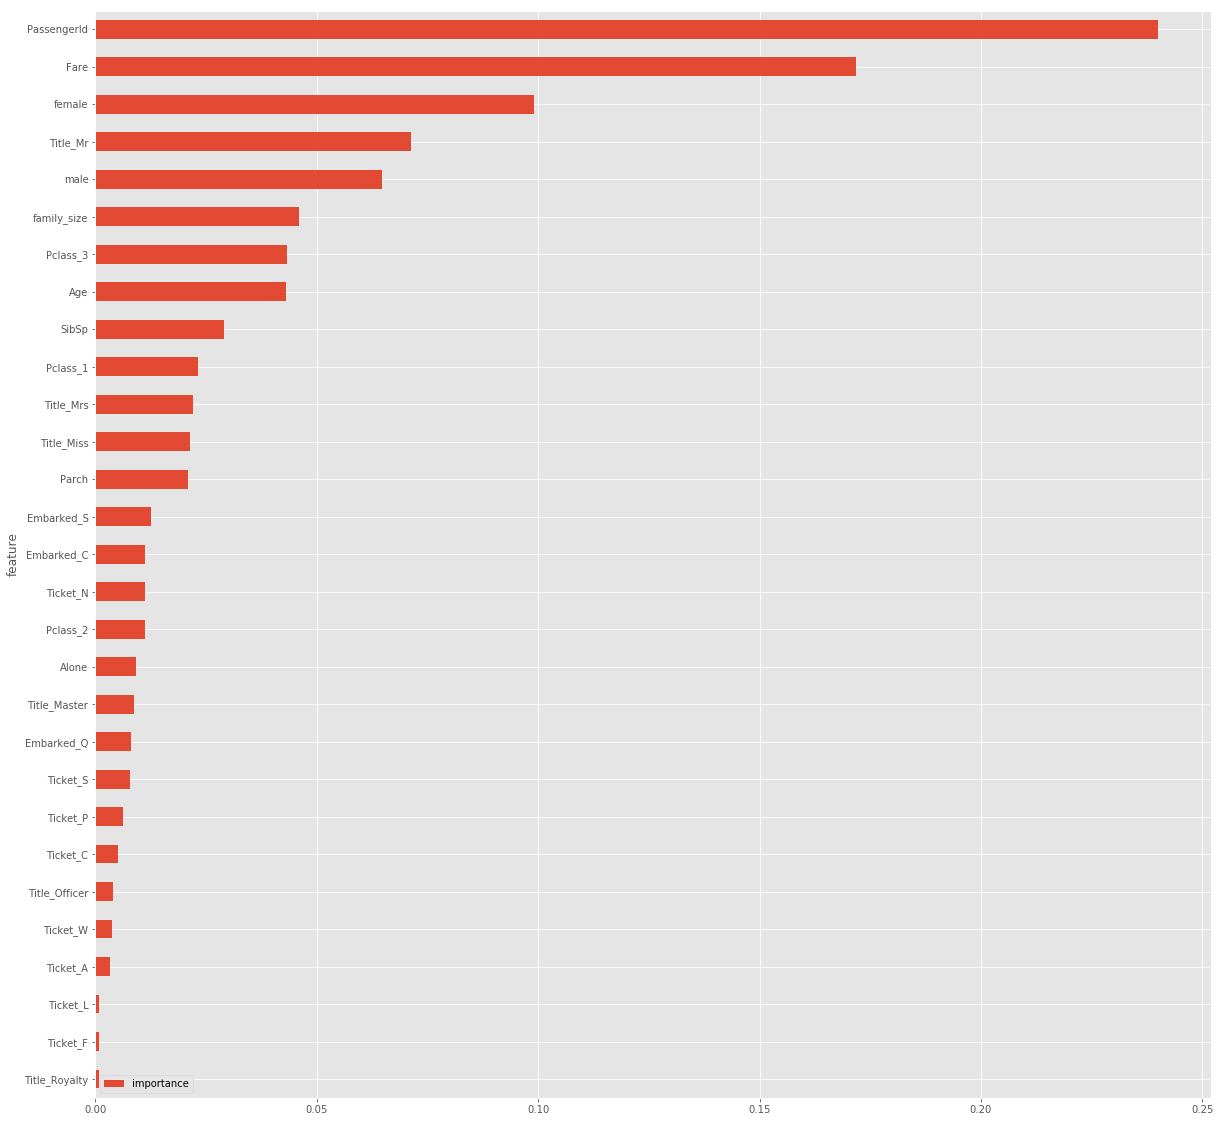

In [214]:
features.plot(kind='barh', figsize=(20, 20))

In [216]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, y)

In [218]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [219]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring = scoring)
    return np.mean(xval)

In [221]:
compute_score(model, train, y, scoring='accuracy')

0.82491798139363015

In [225]:
test.loc[test.Fare.isnull()==True,'Fare'] = df.are
result = model.predict(test).astype(int)
df_result = pd.DataFrame()
tst = pd.read_csv('test.csv')
df_result['PassengerId'] = test['PassengerId']
df_result['Survived'] = result
df_result[['PassengerId', 'Survived']].to_csv('result3.csv', encoding='utf-8', index = False)

C:\Users\ashish\Anaconda2\envs\py35\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [227]:
test.loc[test.Fare.isnull()==True,'Fare'] = df.are

14.4542

In [233]:
test['Fare'].isnull().sum()

0